In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import csv
import datetime

from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# from api_key import api_key
from flask import Flask, jsonify, render_template


from flask_sqlalchemy import SQLAlchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlalchemy



In [5]:
api_key = "93ba5366cb39b249dcbde95cc4d461e7b05b747d"
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []
#&ParameterName={parameter_name}
#url = (f"https://apps.bea.gov/api/data?&UserID={api_key}&method={get_data}&datasetname={dataset}&LineCode={line_code}&TableName={table_name}&GeoFIPS={geofip}&Year={year}")

#SAINC51
#response = requests.get(url).json()       
#list_response = requests.get(list_url).json()

In [726]:
total_exports = requests.get(f"{import_url}/hs?get=GEN_VAL_YR&GEN_VAL_MO&key={api_key}&time=from+2013-01to2018-12").json() 
len(total_exports)

73

In [ ]:
ALL_VAL_YR', 'ALL_VAL_MO', 'time'

In [728]:
count = 1
movalue = []
yrvalue = []
period = []

while count < 72:
    count += 1
    movalue.append(total_exports[count][1])
    yrvalue.append(total_exports[count][0])
    period.append(total_exports[count][2])
tot_import = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue" : movalue,
                          "Period" : period})

In [729]:
tot_import.head()

,YTDValue,MoValue,Period
0,355491464982,170322898015,2013-02
1,537342164976,181850699994,2013-03
2,727897450829,190555285853,2013-04
3,924582838116,196685387287,2013-05
4,1109513297633,184930459517,2013-06


In [730]:
# tot_import.to_sql('import_totals', con=engine, if_exists='replace') #dont run this again

In [742]:
total_imports_to_china = requests.get(f"{import_url}/hs?get=GEN_VAL_YR&GEN_VAL_MO&key={api_key}&time=from+2013-01&CTY_CODE={china_code}").json() 

In [694]:
yr_exports = total_exports[12][0]
yr_exports_china = total_exports_to_china[12][0]
print(total_exports[12][0])
print(total_exports_to_china[12][0])

1664055580908
120341425641


In [744]:
((int(yr_exports) -int(yr_exports_china)) / int(yr_exports)) * 100

len(total_imports_to_china)

74

In [745]:
count = 1
movalue = []
yrvalue = []
period = []

while count < 73:
    count += 1
    movalue.append(total_imports_to_china[count][1])
    yrvalue.append(total_imports_to_china[count][0])
    period.append(total_imports_to_china[count][2])
tot_imports_to_china = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue" : movalue,
                          "Period" : period})

In [746]:
# tot_imports_to_china.to_sql('china_import_totals', con=engine, if_exists='replace') #dont run this again

In [776]:
tot_imports_to_china["MoValue"] = pd.to_numeric(tot_imports_to_china["MoValue"])
tot_imports_to_china["YTDValue"] = pd.to_numeric(tot_imports_to_china["YTDValue"])

In [6]:
# tot_imports_to_china.sort_values('Period', ascending=False)

<Figure size 432x288 with 0 Axes>

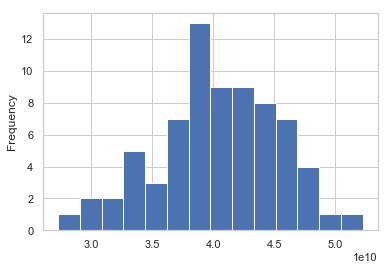

<Figure size 432x288 with 0 Axes>

In [765]:
tot_imports_to_china["MoValue"].plot.hist(bins=14)
plt.figure()

In [7]:
new_tot = tot_imports_to_china[("MoValue", "Period")]


NameError: name 'tot_imports_to_china' is not defined

In [662]:
requests.get(f"https://api.census.gov/data/timeseries/intltrade/exports/hs?get=ALL_VAL_MO,ALL_VAL_YR&time=from+2015&CTY_CODE={china_code}").json()

[['ALL_VAL_MO', 'ALL_VAL_YR', 'time', 'CTY_CODE'],
 ['9459198394', '9459198394', '2015-01', '5700'],
 ['8754588178', '18213786572', '2015-02', '5700'],
 ['9886519164', '28100305736', '2015-03', '5700'],
 ['9279912850', '37380218586', '2015-04', '5700'],
 ['8749787563', '46130006149', '2015-05', '5700'],
 ['9615754115', '55745760264', '2015-06', '5700'],
 ['9505173559', '65250933823', '2015-07', '5700'],
 ['9183456081', '74434389904', '2015-08', '5700'],
 ['9419421166', '83853811070', '2015-09', '5700'],
 ['11324856248', '95178667318', '2015-10', '5700'],
 ['10603592681', '105782259999', '2015-11', '5700'],
 ['10091105315', '115873365314', '2015-12', '5700'],
 ['8202841436', '8202841436', '2016-01', '5700'],
 ['8070084594', '16272926030', '2016-02', '5700'],
 ['8916286008', '25189212038', '2016-03', '5700'],
 ['8672731969', '33861944007', '2016-04', '5700'],
 ['8539888162', '42401832169', '2016-05', '5700'],
 ['8838793248', '51240625417', '2016-06', '5700'],
 ['9128143401', '60368768818

In [518]:
china_exports = requests.get(f"{export_url}/hs?get=ALL_VAL_MO,ALL_VAL_YR&key={api_key}&time=from+2015-01&CTY_CODE={china_code}").json()


In [44]:
# requests.get(f"{export_url}/hs?get=CTY_CODE,CTY_NAME,ALL_VAL_MO,ALL_VAL_YR,E_COMMODITY_LDESC&key={api_key}&time=from+2015-01&CTY_CODE={china_code}").json()


clear


In [45]:
# export_by_commodity = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS4&CTY_CODE={china_code}").json()


In [47]:
len(export_by_commodity)

54073

In [9]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 54072:
    count += 1
    movalue.append(export_by_commodity[count][2])
    yrvalue.append(export_by_commodity[count][3])
    desc.append(export_by_commodity[count][1])
    period.append(export_by_commodity[count][4])
    code.append(export_by_commodity[count][0])
china_data = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value " : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

NameError: name 'export_by_commodity' is not defined

In [51]:

china_data.tail()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
54066,320405,37821,2018-08,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54067,327518,7113,2018-09,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54068,361042,33524,2018-10,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54069,399482,38440,2018-11,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
54070,444867,45385,2018-12,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620


In [8]:
engine = create_engine('sqlite:///../data/china_trade.sqlite', echo=False)


In [3]:
china_data.to_sql('export', con=engine, if_exists='replace') #dont run this again

NameError: name 'china_data' is not defined

In [611]:
import_by_commodity = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS4&CTY_CODE={china_code}").json()

In [612]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 55352:
    count += 1
    movalue.append(import_by_commodity[count][2])
    yrvalue.append(import_by_commodity[count][3])
    desc.append(import_by_commodity[count][1])
    period.append(import_by_commodity[count][4])
    code.append(import_by_commodity[count][0])
import_china_data = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue" : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [614]:
import_china_data.to_sql('import', con=engine, if_exists='replace') 

In [241]:
import_by_product = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_MO,GEN_VAL_YR&key={api_key}&time=from+2015-01&COMM_LVL=HS6&CTY_CODE={china_code}").json()

In [308]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 210375:
    count += 1
    movalue.append(export_by_product[count][2])
    yrvalue.append(export_by_product[count][3])
    desc.append(export_by_product[count][1])
    period.append(export_by_product[count][4])
    code.append(export_by_product[count][0])
export_products = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue " : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "Comm Code": code})

In [310]:
export_products.to_sql('export_products', con=engine, if_exists='replace') 

In [311]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 210375:
    count += 1
    movalue.append(import_by_product[count][2])
    yrvalue.append(import_by_product[count][3])
    desc.append(import_by_product[count][1])
    period.append(import_by_product[count][4])
    code.append(import_by_product[count][0])
import_products = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue " : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "Comm Code": code})

In [314]:
import_products.to_sql('import_products', con=engine, if_exists='replace') 

In [2]:
engine = create_engine('sqlite:///../data/china_trade.sqlite')
#engine = create_engine("sqlite:///db/china_trade.sqlite")




In [623]:
Imports = Base.classes.imports

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
session = Session(engine)


In [4]:
Base.classes.keys()

['china_export_totals',
 'china_import_totals',
 'export',
 'export_totals',
 'hs2export',
 'hs2import',
 'import_totals',
 'imports',
 'yrhs2export',
 'yrhs2import']

In [5]:
Imports = Base.classes.imports

In [13]:
IndImports = Base.classes.hs2import
IndExports = Base.classes.hs2export
YRImports = Base.classes.yrhs2import
YRExports = Base.classes.yrhs2export

In [14]:
Exports = Base.classes.export

In [15]:
imports = session.query(Imports).first()
imports.__dict__


{'Description': 'FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL',
 'HSC': '0305',
 'MoValue': 5385854,
 'Period': '2015-02',
 'YTDValue': 12238358,
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x148b49a28d0>,
 'index': 0}

In [639]:
results = session.query(Imports).statement


In [632]:
df = pd.read_sql_query(results, session.bind)

In [633]:
df.tail()

,index,YTDValue,MoValue,Period,Description,HSC
55346,55346,16225220,2408673,2018-09,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
55347,55347,18913317,2688097,2018-10,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
55348,55348,21687997,2774680,2018-11,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
55349,55349,25122310,3434313,2018-12,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620
55350,55350,1849689,1849689,2019-01,"MONOPODS, BIPODS, TRIPODS AND SIMILAR ARTICLES",9620


In [11]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)
df["HSC"] =pd.to_numeric(df["HSC"])

first_2015 = df[df["Period"].str.contains("2018")]
data_2015 = first_2015.groupby(["Description", "HSC"])["YTDValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(50,"total")
data_2015 = data_2015.reset_index()


data_2015= data_2015.nlargest(50,"total")
data_2015= data_2015.nlargest(50,"total")
data_2015= data_2015.to_dict("records")

In [12]:
data_2015

[{'Description': 'ELECTRIC APPARATUS FOR LINE TEL',
  'HSC': 8517,
  'total': 435762989704},
 {'Description': 'AUTOMATIC DATA PROCESS MACHINES;',
  'HSC': 8471,
  'total': 322280607955},
 {'Description': 'PARTS ETC FOR TYPEWRITERS & OTHER OFFICE MACHINES',
  'HSC': 8473,
  'total': 119542146803},
 {'Description': 'FURNITURE NESOI AND PARTS THEREOF',
  'HSC': 9403,
  'total': 79142616799},
 {'Description': 'TV RECVRS, INCL VIDEO MONITORS & PROJECTORS',
  'HSC': 8528,
  'total': 72741361378},
 {'Description': 'SEATS (EXCEPT BARBER, DENTAL, ETC), AND PARTS',
  'HSC': 9401,
  'total': 70480949179},
 {'Description': 'PARTS & ACCESS FOR MOTOR',
  'HSC': 8708,
  'total': 70089129257},
 {'Description': 'TOYS NESOI; SCALE MODELS ETC; PUZZLES; PARTS ETC',
  'HSC': 9503,
  'total': 65884814216},
 {'Description': 'LAMPS & LIGHTING FITTINGS & PARTS ETC NESOI',
  'HSC': 9405,
  'total': 47589766995},
 {'Description': 'TRAVEL GOODS, HANDBAGS, WALLETS',
  'HSC': 4202,
  'total': 40123548959},
 {'Descr

In [641]:
totals = session.query(YRImports).statement

In [643]:
totalsdf = pd.read_sql_query(totals, session.bind)

In [644]:
totalsdf.head()

,index,YTDValue,Period,Description,HSC
0,0,8795505192,2017,"OPTIC, PHOTO ETC, MEDIC OR S",90
1,1,934275,2017,LEAD AND ARTICLES THEREOF,78
2,2,4395134,2018,LEAD AND ARTICLES THEREOF,78
3,3,4395755887,2016,"OPTIC, PHOTO ETC, MEDIC OR S",90
4,4,5213173,2015,LEAD AND ARTICLES THEREOF,78


In [14]:
list(df.columns)

['index', 'YTDValue', 'MoValue', 'Period', 'Description', 'HSC']

In [13]:
sel = [
        Imports.Description,
        Imports.YTDValue,
        Imports.MoValue,
        Imports.Period,
        Imports.Description
    ]

AttributeError: type object 'imports' has no attribute 'MoValue'

In [3]:
# session.query(*sel).filter(Imports.HSC == "305").all()

In [27]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)


In [120]:
##### GOOD CODE FOR INDIVIDUAL SEARCHES IE TOOLTIP"
year = 2018
hsc = 97
sel = [
        Imports.Description,
        Imports.YTDValue,
        Imports.Period,
        Imports.HSC
        ]

results = session.query(*sel).filter(Imports.HSC == hsc).filter(Imports.Period.like(f"%{year}%")).all()
hsc_data = {}
for result in results:
    hsc_data["Description"] = result[0]
    hsc_data["Annual Value"] = result[1]
    hsc_data["Year"] = result[2]
    hsc_data["HSC"] = result[3]

In [137]:
hsc_data

{'Annual Value': 252327033,
 'Description': 'SPECIAL IMPORT PROVISIONS, NESOI',
 'HSC': 99,
 'Year': '2015-01'}

In [451]:
year_hs2 = requests.get(f"{import_url}/hs?get=I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_YR&YEAR=2015&YEAR=2016&YEAR=2017&YEAR=2018&YEAR=2019&COMM_LVL=HS2&CTY_CODE={china_code}").json()


In [458]:
len(year_hs2)

4803

In [453]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(year_hs2[count][2])
    desc.append(year_hs2[count][1])
    period.append(year_hs2[count][3])
    code.append(year_hs2[count][0])
yr_hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [454]:
yr_hs2_import.to_sql('yrhs2import', con=engine, if_exists='replace') 

In [455]:
year_hs2exp = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_YR&YEAR=2015&YEAR=2016&YEAR=2017&YEAR=2018&YEAR=2019&COMM_LVL=HS2&CTY_CODE={china_code}").json()


In [456]:
len(year_hs2exp)

4746

In [460]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4745:
    count += 1
    yrvalue.append(year_hs2exp[count][2])
    desc.append(year_hs2exp[count][1])
    period.append(year_hs2exp[count][3])
    code.append(year_hs2exp[count][0])
yr_hs2_export = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [461]:
yr_hs2_export.to_sql('yrhs2export', con=engine, if_exists='replace') 

In [19]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(import_hs2[count][2])
    desc.append(import_hs2[count][1])
    period.append(import_hs2[count][3])
    code.append(import_hs2[count][0])
hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})


In [21]:
# hs2_import.to_sql('hs2import', con=engine, if_exists='replace') 

In [301]:
export_hs2 = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2015-01&COMM_LVL=HS2&CTY_CODE={china_code}").json()



In [306]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4745:
    count += 1
    movalue.append(export_hs2[count][2])
    yrvalue.append(export_hs2[count][3])
    desc.append(export_hs2[count][1])
    period.append(export_hs2[count][4])
    code.append(export_hs2[count][0])
hs2_export = pd.DataFrame({"YTDValue" : yrvalue,
                           "MoValue " : movalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})


In [307]:
hs2_export.to_sql('hs2export', con=engine, if_exists='replace') 


In [ ]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 4802:
    count += 1
    yrvalue.append(import_hs2[count][2])
    desc.append(import_hs2[count][1])
    period.append(import_hs2[count][3])
    code.append(import_hs2[count][0])
hs2_import = pd.DataFrame({"YTDValue" : yrvalue,
                          "Period" : period,
                          "Description" : desc,
                          "HSC": code})

In [505]:
stmt = session.query(IndImports).statement
df = pd.read_sql_query(stmt, session.bind)

In [503]:
stmt = session.query(IndImports).statement
df = pd.read_sql_query(stmt, session.bind)

year = 2015
hsc = 1
sel = [
        IndImports.Description,
        IndImports.YTDValue,
        IndImports.Period,
        IndImports.HSC
        ]

results = session.query(*sel).filter(IndImports.HSC == 1).filter(IndImports.Period.like(f"%{year}%")).all()
hsc_ind_imports = {}
for result in results:
    hsc_ind_imports["Description"] = result[0]
    hsc_ind_imports["Annual Value"] = result[1]
    hsc_ind_imports["Year"] = result[2]
    hsc_ind_imports["HSC"] = result[3]

In [178]:
g = session.query(IndImports.HSC).filter(IndImports.HSC == "01").all()

In [504]:
hsc_ind_imports

{'Annual Value': 27704684,
 'Description': 'LIVE ANIMALS',
 'HSC': 1,
 'Year': '2015-12'}

In [3]:
yr = session.query(Imports).first()
yr.__dict__

NameError: name 'session' is not defined

In [16]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)

In [17]:
dates = df.loc[df['Period'] == 2016]

In [18]:
test_df = df.groupby(["Period"])["YTDValue", "HSC", "Period"]

In [19]:
df["YTDValue", "HSC", "Period"]= [i[:4] for i in df['Period']]

In [399]:
yr_hs2_import["YTDValue"] =pd.to_numeric(yr_hs2_import["YTDValue"])


In [400]:
year = "2015"
first_2015 = yr_hs2_import[yr_hs2_import["Period"].str.contains(f"{year}")]


In [502]:
check = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()


In [582]:
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

data_2015= data_2015.nlargest(10,"total")

ValueError: If using all scalar values, you must pass an index

In [403]:
data_2015

,HSC,Description,Period,total
0,85,ELECTRIC MACHINERY ETC; SOUND,2015,818112819400
1,84,"NUCLEAR REACTORS, BOILERS, MACHINERY ETC.; PARTS",2015,666100643226
2,94,FURNITURE; BEDDING ETC; LAMPS NESOI ETC,2015,181010404192
3,95,"TOYS, GAMES & SPORT EQUIPMENT; PARTS & ACCESSO...",2015,137998619706
4,64,"FOOTWEAR, GAITERS ETC. AND PARTS THEREOF",2015,113801708948
5,61,"APPAREL ARTICLES AND ACCESSORIES, KNIT OR CROCHET",2015,97092844954
6,62,"APPAREL ARTICLES AND ACCESSORIES, NOT KNIT ETC.",2015,94814507202
7,39,PLASTICS AND ARTICLES THEREOF,2015,94005729937
8,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS...",2015,85574454525
9,90,"OPTIC, PHOTO ETC, MEDIC OR S",2015,71151180495


In [ ]:
year= "2016"
stmt = session.query(YRExports).statement
df = pd.read_sql_query(stmt, session.bind)
df["YTDValue"] =pd.to_numeric(df["YTDValue"])
first_2015 = df[df["Period"].str.contains(f"{year}")]
data_2015 = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

data_2015= data_2015.nlargest(10,"total")

########BAR CHART API ROUTE#############

In [802]:
barImports = Base.classes.imports

In [813]:
fmt = "%Y"
hsc = "3915"
year = "2018"
stmt = session.query(barImports).statement
# df = pd.read_sql_query(stmt, session.bind, parse_dates = ["Period"]) # FIX DATETIME
df = pd.read_sql_query(stmt, session.bind)
df = df[df["Period"].str.contains(f"{year}")]
products = df.loc[df["HSC"] == "3915"]
products

,index,YTDValue,MoValue,Period,Description,HSC
19385,19385,1969631,1969631,2018-01,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19386,19386,2546866,577235,2018-02,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19387,19387,2996761,449895,2018-03,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19388,19388,3618122,621361,2018-04,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19389,19389,4498754,880632,2018-05,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19390,19390,5649094,1150340,2018-06,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19391,19391,6531562,882468,2018-07,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19392,19392,7325378,793816,2018-08,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19393,19393,7780608,455230,2018-09,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19394,19394,8313696,533088,2018-10,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915


In [807]:
df["Period"][1]

'2015-03'

In [553]:
df= df[df["Period"].str.contains("2016")]
df.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13583 entries, 11 to 55300
Data columns (total 6 columns):
index          13583 non-null int64
YTDValue       13583 non-null int64
MoValue        13583 non-null int64
Period         13583 non-null object
Description    13583 non-null object
HSC            13583 non-null int64
dtypes: int64(4), object(2)
memory usage: 742.8+ KB


In [552]:
fish = df.loc[df["HSC"] == 3915]
fish

,index,YTDValue,MoValue,Period,Description,HSC
19361,19361,611625,611625,2016-01,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19362,19362,1260380,648755,2016-02,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19363,19363,1660202,399822,2016-03,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19364,19364,2380387,720185,2016-04,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19365,19365,3031924,651537,2016-05,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19366,19366,3676290,644366,2016-06,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19367,19367,4421071,744781,2016-07,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19368,19368,4924792,503721,2016-08,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19369,19369,5583605,658813,2016-09,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915
19370,19370,6113921,530316,2016-10,"WASTE, PARINGS AND SCRAP, OF PLASTICS",3915


In [484]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from pandas.tools.plotting import parallel_coordinates


<BarContainer object of 12 artists>

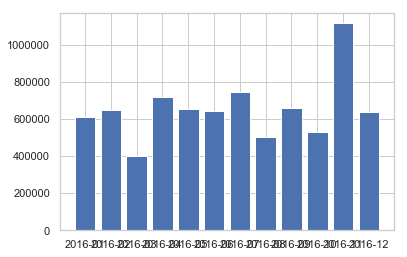

In [556]:
plt.bar(fish["Period"], fish["MoValue"], data=fish)


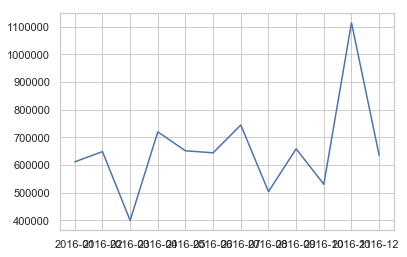

In [557]:
plt.plot(fish["Period"], fish["MoValue"])


TypeError: '<' not supported between instances of 'int' and 'str'

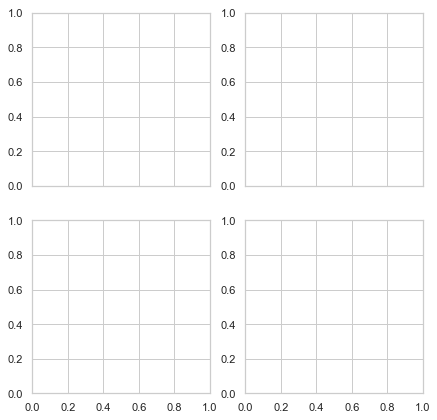

In [558]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

sns.distplot(fish, kde=False, color="b", ax=axes[0,0])

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55351 entries, 0 to 55350
Data columns (total 6 columns):
index          55351 non-null int64
YTDValue       55351 non-null int64
MoValue        55351 non-null int64
Period         55351 non-null object
Description    55351 non-null object
HSC            55351 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ MB


In [560]:
new_list = [newdf.columns.values.tolist()] + newdf.values.tolist()
newdf = pd.to_numeric(new_list)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [561]:
data = [go.bar(x=df["Period"], y=df["MoValue"])]

TypeError: 'module' object is not callable

In [415]:
py.iplot(data, filename="basic-bar")

NameError: name 'data' is not defined

In [539]:
year= "2016"
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)
df["MoValue"] =pd.to_numeric(df["MoValue"])
first_2015 = df[df["Period"].str.contains(f"{year}")]
data_2015 = first_2015.groupby(["HSC","Description"])["MoValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

In [540]:
data_2015

,HSC,Description,total
0,8517,ELECTRIC APPARATUS FOR LINE TEL,60228826117
1,8471,AUTOMATIC DATA PROCESS MACHINES;,46662247036
2,9503,TOYS NESOI; SCALE MODELS ETC; PUZZLES; PARTS ETC,12010683455
3,8473,PARTS ETC FOR TYPEWRITERS & OTHER OFFICE MACHINES,10537950716
4,9403,FURNITURE NESOI AND PARTS THEREOF,10154174021
5,8528,"TV RECVRS, INCL VIDEO MONITORS & PROJECTORS",10027458047
6,9401,"SEATS (EXCEPT BARBER, DENTAL, ETC), AND PARTS",9376506501
7,8708,PARTS & ACCESS FOR MOTOR,9085445874
8,9405,LAMPS & LIGHTING FITTINGS & PARTS ETC NESOI,6763549378
9,8443,PRINT MACH INCL INK-JET MACH ANCIL T PRN,6751103520


In [555]:
data_2015.plot(kind='pie', subplots=True, figsize=(16,8))


ValueError: pie doesn't allow negative values

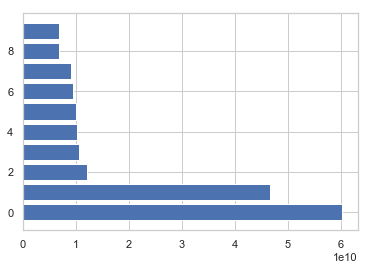

In [541]:
height = data_2015["total"]
bars = data_2015["HSC"]
y_pos = np.arange(len(bars))
 

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
# plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


In [503]:
first_2015 = df[df["Period"].str.contains(f"{year}")]
first_2015.head()
test= pd.DataFrame({"total" : data_2015})


ValueError: If using all scalar values, you must pass an index

In [490]:
df["YTDValue"] =pd.to_numeric(df["YTDValue"])
first_2015 = df[df["Period"].str.contains(f"{year}")]
data_2015 = first_2015.groupby(["HSC","Description","Period"])["YTDValue"].sum()
test= pd.DataFrame({"total" : data_2015})
data_2015= test.nlargest(10,"total")
data_2015 = data_2015.reset_index()

imp_2015= data_2015.nlargest(10,"total")

{'Annual Value': 't', 'Description': 'o', 'HSC': 't'}

In [397]:
data_2015.to_dict("records")

[{'Description': 'ELECTRIC MACHINERY ETC; SOUND',
  'HSC': '85',
  'Period': '2016',
  'total': 772743932606},
 {'Description': 'NUCLEAR REACTORS, BOILERS, MACHINERY ETC.; PARTS',
  'HSC': '84',
  'Period': '2016',
  'total': 618577640057},
 {'Description': 'FURNITURE; BEDDING ETC; LAMPS NESOI ETC',
  'HSC': '94',
  'Period': '2016',
  'total': 186389949178},
 {'Description': 'TOYS, GAMES & SPORT EQUIPMENT; PARTS & ACCESSORIES',
  'HSC': '95',
  'Period': '2016',
  'total': 135631111857},
 {'Description': 'FOOTWEAR, GAITERS ETC. AND PARTS THEREOF',
  'HSC': '64',
  'Period': '2016',
  'total': 97682661765},
 {'Description': 'PLASTICS AND ARTICLES THEREOF',
  'HSC': '39',
  'Period': '2016',
  'total': 92592307290},
 {'Description': 'APPAREL ARTICLES AND ACCESSORIES, NOT KNIT ETC.',
  'HSC': '62',
  'Period': '2016',
  'total': 89612164830},
 {'Description': 'APPAREL ARTICLES AND ACCESSORIES, KNIT OR CROCHET',
  'HSC': '61',
  'Period': '2016',
  'total': 87876881801},
 {'Description': 

In [398]:
df['Period'] = int(df['Period'])

TypeError: cannot convert the series to <class 'int'>

In [399]:
df.iloc["2015-01"]

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2015-01] of <class 'str'>

In [21]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)

In [22]:
df.head()

,index,YTDValue,MoValue,Period,Description,HSC
0,0,12238358,5385854,2015-02,"FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL",0305
1,1,16629923,4391565,2015-03,"FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL",0305
2,2,19522841,2892918,2015-04,"FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL",0305
3,3,23971868,4449027,2015-05,"FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL",0305
4,4,29755208,5783340,2015-06,"FISH, DRIED, SALTED ETC, SMOKED ETC; ED FISH MEAL",0305


In [23]:
dates_2016 = df.loc[df['Period'].str.contains("2016-12")]
dates_2015 = df.loc[df['Period'].str.contains("2015-12")]
dates_2017 = df.loc[df['Period'].str.contains("2017-12")]
dates_2018 = df.loc[df['Period'].str.contains("2018-12")]

In [648]:
dates_2016 = df.loc[df["Period"].str.contains("2016")]

In [28]:
dates_2016["MoValue"].sum()

39364457545

In [576]:
dates = df.loc[df['Period'].str.contains("2015-12")]

In [27]:
dates

,index,YTDValue,MoValue,Period,Description,HSC


In [660]:
yearly_imports = pd.concat([dates_2015, dates_2016, dates_2017, dates_2018], ignore_index=True)
# df = df.drop(["index"], axis=1)
df.head()

,YTDValue,Period,Description,HSC
0,8795505192,2017,"OPTIC, PHOTO ETC, MEDIC OR S",90
1,934275,2017,LEAD AND ARTICLES THEREOF,78
2,4395134,2018,LEAD AND ARTICLES THEREOF,78
3,4395755887,2016,"OPTIC, PHOTO ETC, MEDIC OR S",90
4,5213173,2015,LEAD AND ARTICLES THEREOF,78
5,4635293474,2017,"OPTIC, PHOTO ETC, MEDIC OR S",90
6,9285668047,2016,"OPTIC, PHOTO ETC, MEDIC OR S",90
7,5164112,2016,LEAD AND ARTICLES THEREOF,78
8,2817358,2018,LEAD AND ARTICLES THEREOF,78
9,7424893338,2018,"OPTIC, PHOTO ETC, MEDIC OR S",90


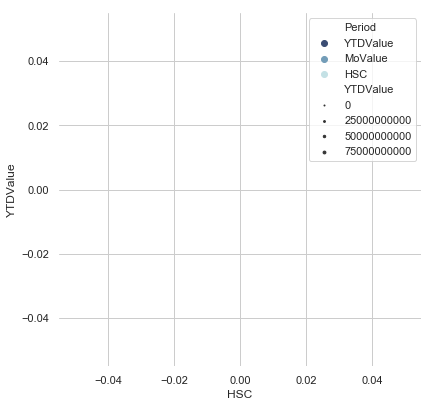

In [17]:
import seaborn as sns
from seaborn import scatterplot


import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import pandas as pd
imports_data = df
imports = ["YTDValue", "MoValue", "HSC"]


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="HSC", y="YTDValue",
                hue="Period", size="YTDValue",
                palette="ch:r=-.2,d=.3_r",
                hue_order=imports,
                sizes=(1, 8), linewidth=0,
                data=imports_data, ax=ax)

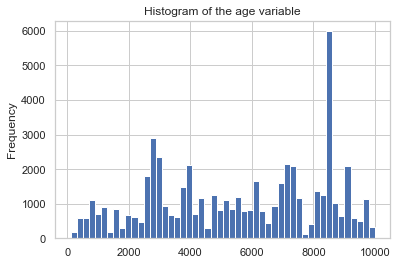

In [61]:
df['HSC'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

TypeError: reduction operation 'mean' not allowed for this dtype

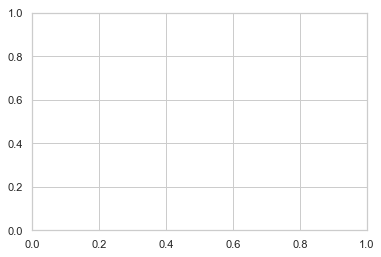

In [56]:
df["Period"] = pd.to_datetime(df["Period"])
sns.regplot(x=df["YTDValue"], y=df["Period"], line_kws={"color":"r","alpha":0.7,"lw":5})


In [195]:
stmt = session.query(Imports).statement
df = pd.read_sql_query(stmt, session.bind)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55351 entries, 0 to 55350
Data columns (total 6 columns):
index          55351 non-null int64
YTDValue       55351 non-null int64
MoValue        55351 non-null int64
Period         55351 non-null object
Description    55351 non-null object
HSC            55351 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ MB


In [204]:
import_products.head()
from scipy.stats import zscore
df["MO_zscore"] = zscore(df["MoValue"])
df["is_outlier"] = df["MO_zscore"].apply(
  lambda x: x <= -1.5 or x >= 1.5
)
superdf = df[df["is_outlier"]].sort_values(by=['HSC'], ascending = False)

In [ ]:
superdf

DO NOT LOSE THE ZSCORES

In [202]:
import_products.to_csv("products.csv")
prodcuts = pd.read_csv("products.csv")
prodcuts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210374 entries, 0 to 210373
Data columns (total 6 columns):
Unnamed: 0     210374 non-null int64
YTDValue       210374 non-null int64
MoValue        210374 non-null int64
Period         210374 non-null object
Description    210374 non-null object
HSC            210374 non-null int64
dtypes: int64(4), object(2)
memory usage: 9.6+ MB


In [248]:

prodcuts["MO_zscore"] = zscore(prodcuts["MoValue "])
prodcuts["is_outlier"] = prodcuts["MO_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
super_products = prodcuts[prodcuts["is_outlier"]].sort_values(by=['MO_zscore'], ascending = False)

In [262]:
super_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 149534 to 156824
Data columns (total 8 columns):
Unnamed: 0     1199 non-null int64
YTDValue       1199 non-null int64
MoValue        1199 non-null int64
Period         1199 non-null object
Description    1199 non-null object
HSC            1199 non-null int64
MO_zscore      1199 non-null float64
is_outlier     1199 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 76.1+ KB


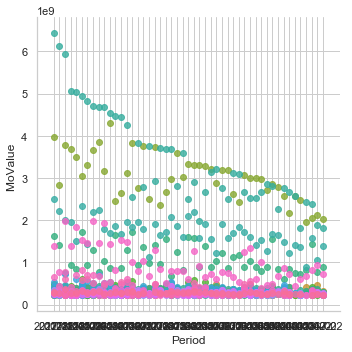

In [268]:
sns.lmplot( x="Period", y="MoValue ", data=super_products, fit_reg=False, hue='HSC', legend=False)


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55351 entries, 0 to 55350
Data columns (total 8 columns):
index          55351 non-null int64
YTDValue       55351 non-null int64
MoValue        55351 non-null int64
Period         55351 non-null object
Description    55351 non-null object
HSC            55351 non-null int64
MO_zscore      55351 non-null float64
is_outlier     55351 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


In [278]:
super_products.head()

,Unnamed: 0,YTDValue,MoValue,Period,Description,HSC,MO_zscore,is_outlier
149534,149534,38461288354,6444382794,2017-11,PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS ...,851712,75.633088,True
151201,151201,44577517744,6116229390,2017-12,PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS ...,851712,71.776006,True
194015,194015,34845086208,5948806825,2018-10,PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS ...,851712,69.808138,True
95442,95442,33227896048,5068329121,2016-11,PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS ...,851712,59.459093,True
40516,40516,32272187463,5039392299,2015-10,PHONES FOR CELLULAR NTWKS OR FOR OTH WIRELESS ...,851712,59.118972,True


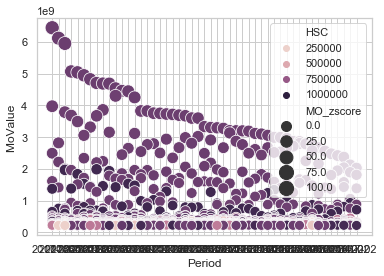

In [277]:

ax = sns.scatterplot(x="Period", y="MoValue ",
                     hue="HSC", size="MO_zscore",
                      sizes=(100, 200),
                     data=super_products)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset


Text(0,0.5,'Group')

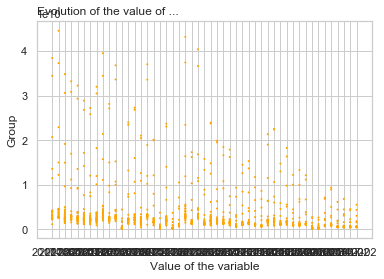

In [276]:
x = super_products["Period"]
y = super_products["YTDValue"]
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')

plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


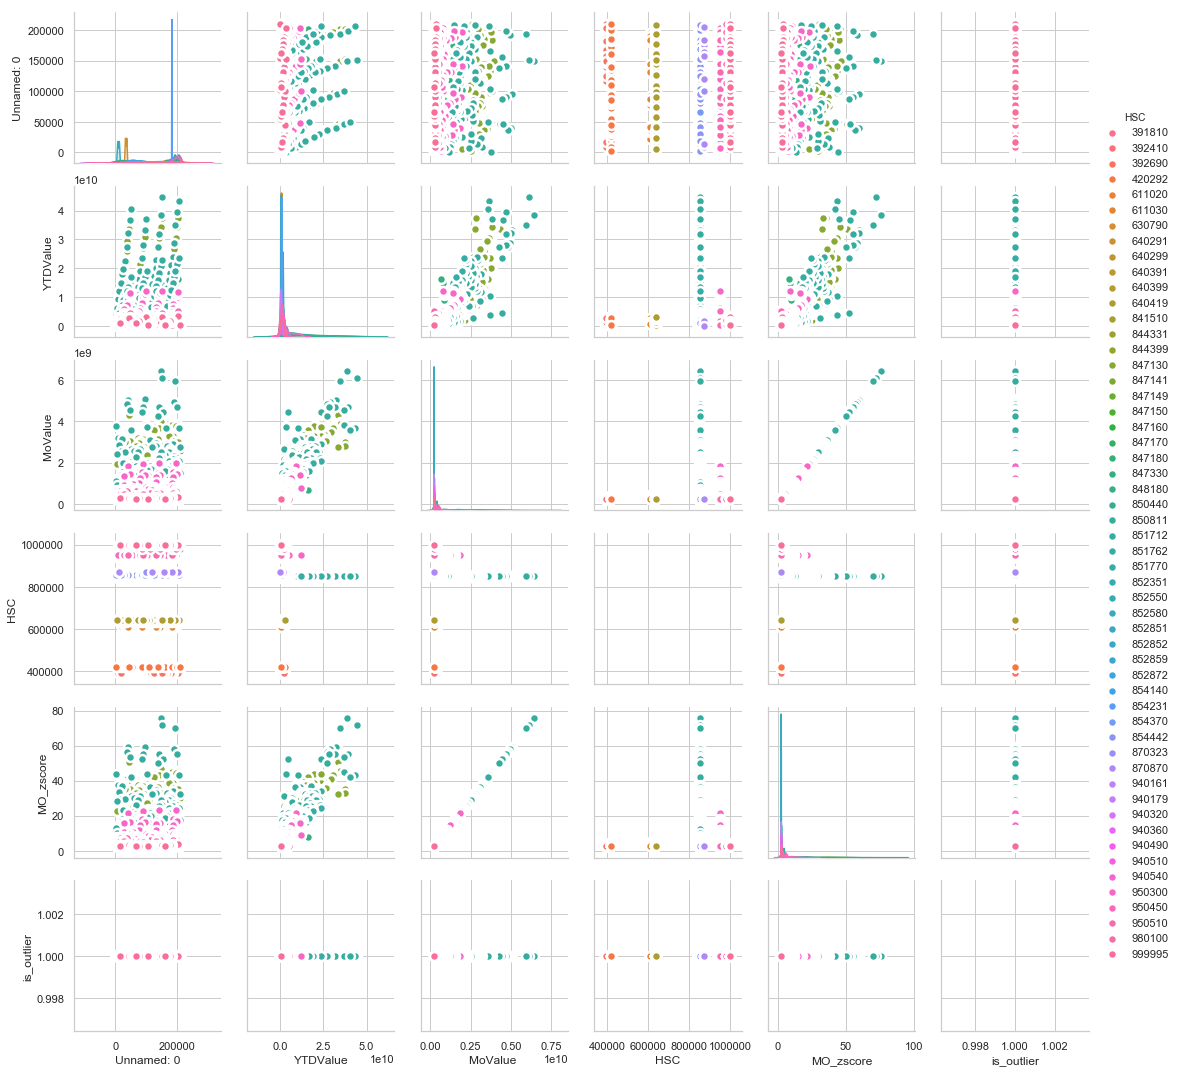

In [280]:
# Plot miles per gallon against horsepower with other semantics
df = super_products
 

 
sns.pairplot(df, kind="scatter", hue="HSC", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


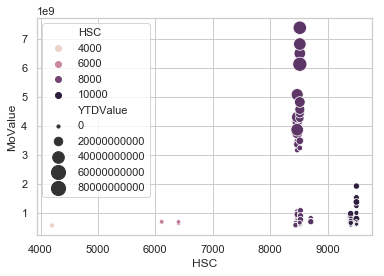

In [143]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="HSC", y="MoValue",
                     hue="HSC", size="YTDValue",
                      sizes=(10, 200),
                     data=newdf)

In [121]:
scatterdf = newdf[["HSC", "Period"]]
scatterdf["Period"] = pd.to_numeric(df["Period"])

scatterdf.info()

ValueError: Unable to parse string "2015-02" at position 0

In [144]:
scatterdf.plot.scatter(x="HSC", y="Period")

ValueError: scatter requires y column to be numeric

In [145]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 21948 to 53545
Data columns (total 8 columns):
index          125 non-null int64
YTDValue       125 non-null int64
MoValue        125 non-null int64
Period         125 non-null datetime64[ns]
Description    125 non-null object
HSC            125 non-null int64
MO_zscore      125 non-null float64
is_outlier     125 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 7.9+ KB


In [38]:

# Load the example car crash dataset
# Plot the crashes where alcohol was involved


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

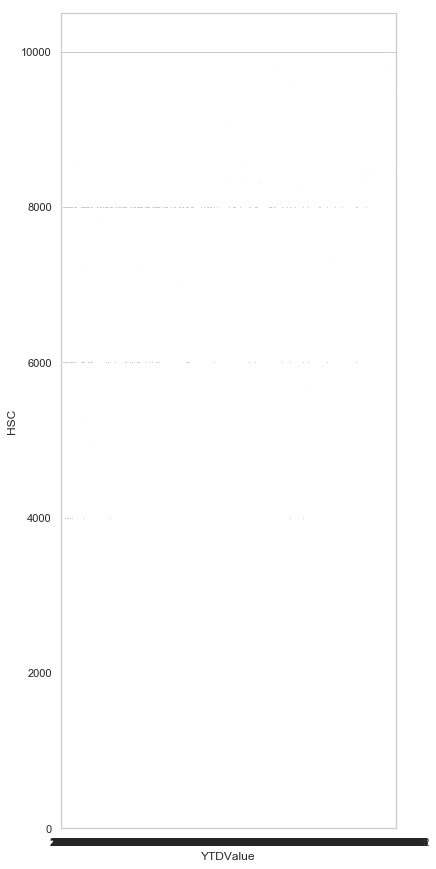

In [33]:
X = df['YTDValue']
X.shape

(55351,)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])